<a href="https://colab.research.google.com/github/Prajwal011/LLM-s/blob/main/Evaluating_llm's_with_Langsmith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Langsmith introduction**

LangSmith is a full-fledged platform to test, debug, and evaluate LLM applications. Perhaps, its most important feature is LLM output evaluation and performance monitoring. In this tutorial, we will see the framework in action and learn techniques to apply it in your own projects.

## **Why LangSmith?**

LangSmith is a powerful tool for building and refining LLM applications.

**Key benefits:**

- Rapid development: Quick setup lets you prototype and launch quickly.
- Quality assurance: Rigorous evaluation prevents costly mistakes.
- Real-time insights: Monitor performance and identify issues instantly.
- Seamless integration: Works perfectly with LangChain for efficient development.
- Improved models: Use datasets to enhance model performance.

**LLM Application Development Workflow:**

- Develop: Build your LLM application using LangChain.
- Productionize: Test thoroughly with LangSmith's evaluation tools.
- Deploy: Launch your application as a REST API.


Let's dive into LangSmith and see it in action!

LangSmith Platform Overview
We will begin with understanding the web UI. It is available through smith.langchain.com link. For access, you have to sign up and get cleared from the waitlist, as it is currently in closed beta.

But once you are in, the landing page will look like this:

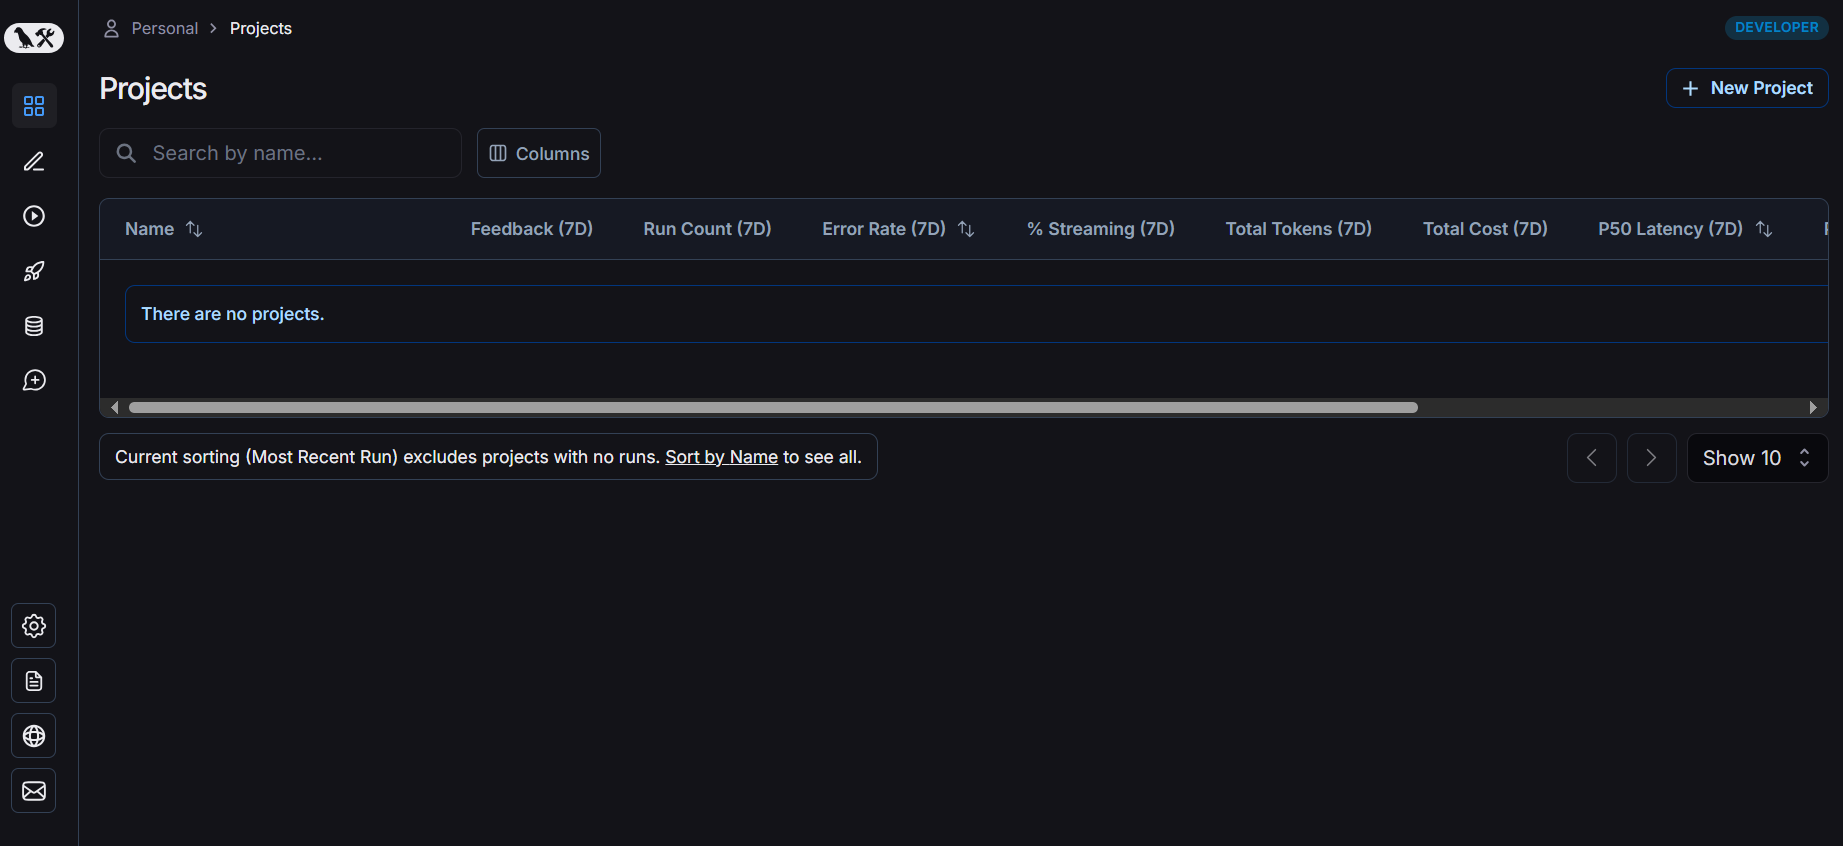
The two main sections are projects and datasets & testing, and both sections can be manipulated through Python SDK. The platform also has tabs for deployment and annotation queues, but they are beyond the scope of this notebook.

### **Setting up LangSmith Python SDK**

Managing projects in LangSmith is far easier with its Python SDK, which is connected to the platform through an API key.

To get a key, click on the key icon in the platform and save it somewhere safe. Then, in a new directory with a new virtual environment initialized, create a .env file. Inside, paste the following two lines:

In [ ]:
### install necessary library
!pip install -q -U langsmith langchain python-dotenv langchain_community langchain-huggingface transformers==4.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.5 MB/s eta 0:00:00


In [ ]:
import warnings

from dotenv import find_dotenv, load_dotenv

warnings.filterwarnings("ignore")

Setting LANGCHAIN_TRACING_V2 to True enables tracing (logging), which is essential to debugging LLMs. Afterwards, we initialize a client to talk to the LangSmith platform:

In [ ]:
import os
##find_dotenv and load_dotenv functions to read environment variables
load_dotenv(find_dotenv())
os.environ["LANGCHAIN_API_KEY"] = "langchain_api_key"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

client contains high-level commands to manipulate projects and assets in LangSmith. The first command of the client we will use is creating a new project:

In [ ]:
from langsmith import Client

# Initialize a client
client = Client()

In [ ]:
import uuid

# Create id
uid = uuid.uuid4()
# Create a unique name
PROJECT_NAME = "Code buddy" + str(uid)
# Create the project
session = client.create_project(
   project_name=PROJECT_NAME,
   description="A project that helps with python code",
)

After create_project successfully runs, you can see the project listed in the Projects section of the web UI:

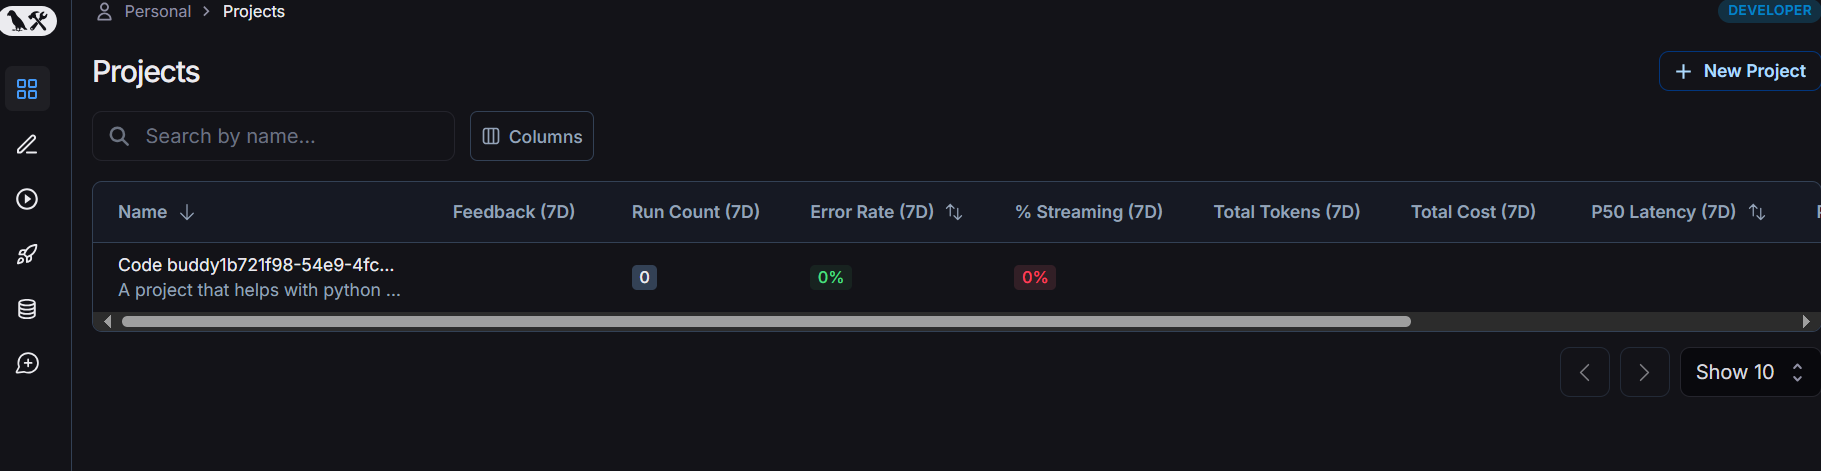

In [ ]:
### set env to project
os.environ["LANGCHAIN_PROJECT"] = PROJECT_NAME

Now, we need an LLM for our project. We will go with GPT-3.5 turbo since it is cheaper, but you can use many other models available through langchain. OpenAI models are initialized through the ChatOpenAI class.

In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from langchain_community.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace

llm = HuggingFaceEndpoint(repo_id="HuggingFaceH4/zephyr-7b-beta")

llm = ChatHuggingFace(llm=llm)

In [ ]:
llm.invoke("Hello, chatty, how you doin' today?")

AIMessage(content="Hi there! I'm doing great, thanks for asking. I'm here to assist you with any questions you may have. How may I help you today?", id='run-75163998-b0ab-422d-9520-33248ee3199e-0')

If you quickly check the project from the UI, you will see the above run traced (logged):

When we set up the environment variables and the client, we automatically enabled logging. As you can see, we already have a bunch of metadata about the run.

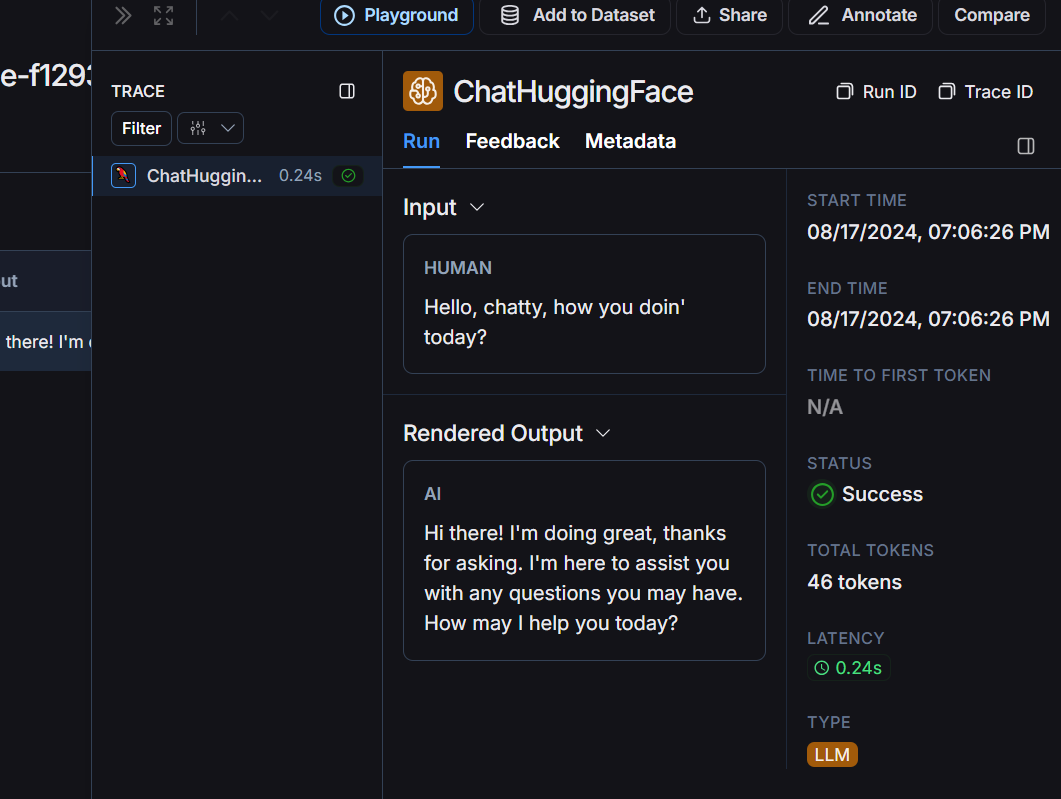

Let’s run a couple more prompts:




In [ ]:
message = llm.invoke("Do you know how to generate flashcards?")

print(message.content)

Yes, I can guide you on how to generate flashcards using various methods:

1. Using a flashcard app or website:
There are many apps and websites available that allow you to create flashcards for free or for a small fee. Some popular options include Quizlet, Anki, and StudyBlue. Here's how you can use Quizlet:

a. Go to Quizlet.com and sign up for an account.
b. Click on the "Make a Set" button and enter your flashcards.
c. You can add images, audio, and videos to your flashcards to make them more engaging.
d. Once you've added all your flashcards, you can study them using different modes, such as flashcards, learn, or test.

2. Using a spreadsheet:
You can also create flashcards using a spreadsheet program like Microsoft Excel or Google Sheets. Here's how:

a. Create a new spreadsheet and label the first column "Term" and the second column "Definition."
b. Add your terms and definitions to the spreadsheet, one per row.
c. To make the flashcards interactive, you can add a third column f

We can already build a basic text summarizer. Let’s summarize the output of the last run:




In [ ]:
prompt = f"Summarize this text: {message.content}"

summary = llm.invoke(prompt)

print(summary.content)

This text provides three methods to generate flashcards: using a flashcard app or website, using a spreadsheet, and using an online flashcard maker tool. The first method involves using apps and websites like Quizlet, Anki, or StudyBlue to create flashcards with features like images, audio, and video. The second method involves creating flashcards using a spreadsheet program like Microsoft Excel or Google Sheets by labeling columns for terms, definitions, and optional images or audio. The third method involves using online tools like Flashcards.com or Make Flashcards to add terms, definitions, and media without the need for an account or app download. These methods provide flexibility in generating flashcards based on personal preference and accessibility.


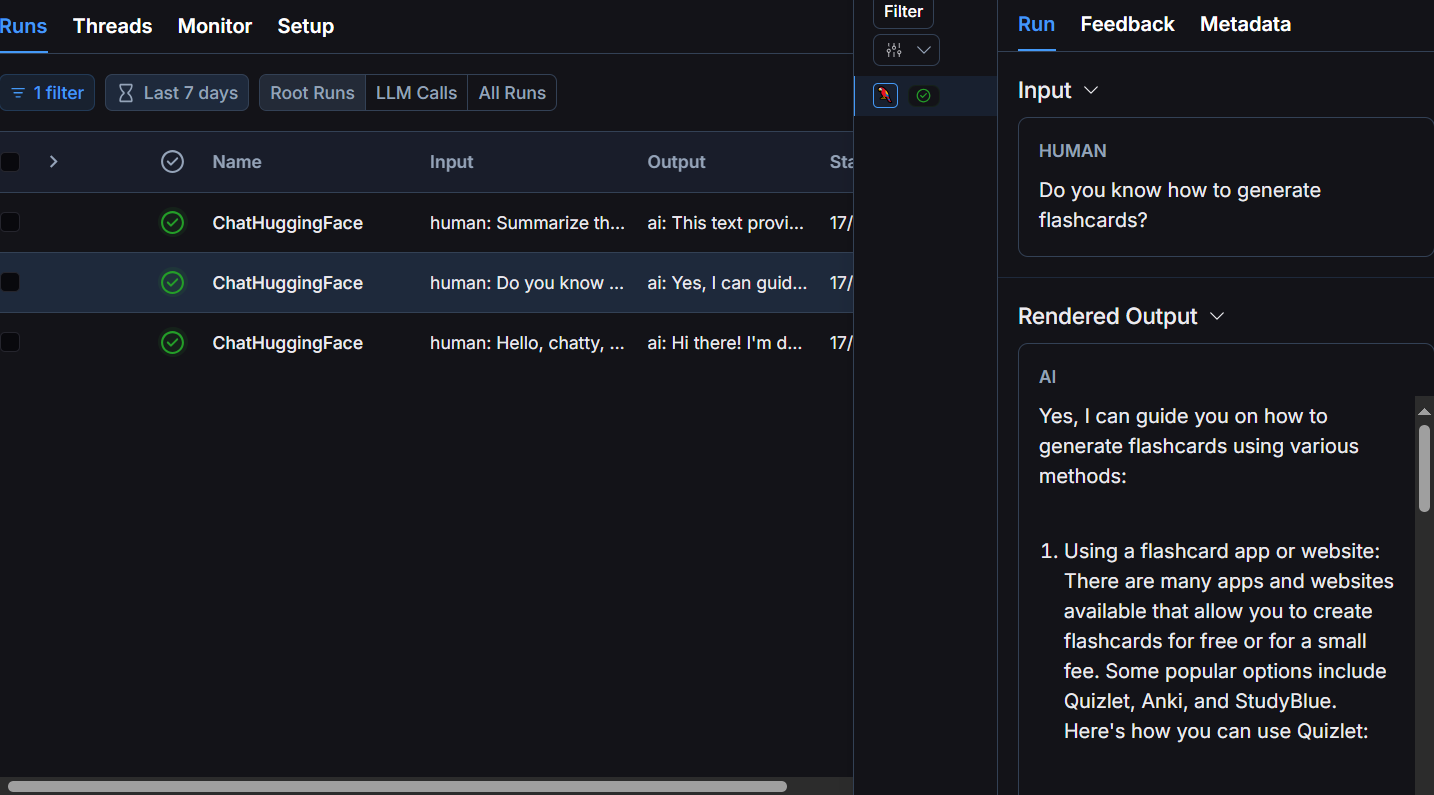

## Creating Labeled Datasets


Creating Labeled Datasets
Sometimes, you may decide to create a dataset of prompts with expected outputs, e.g., labeled datasets. You can create labeled datasets in various formats, but perhaps the most common one is a CSV file. For example, here is a file I generated with ChatGPT that contains five questions on PyTorch syntax:

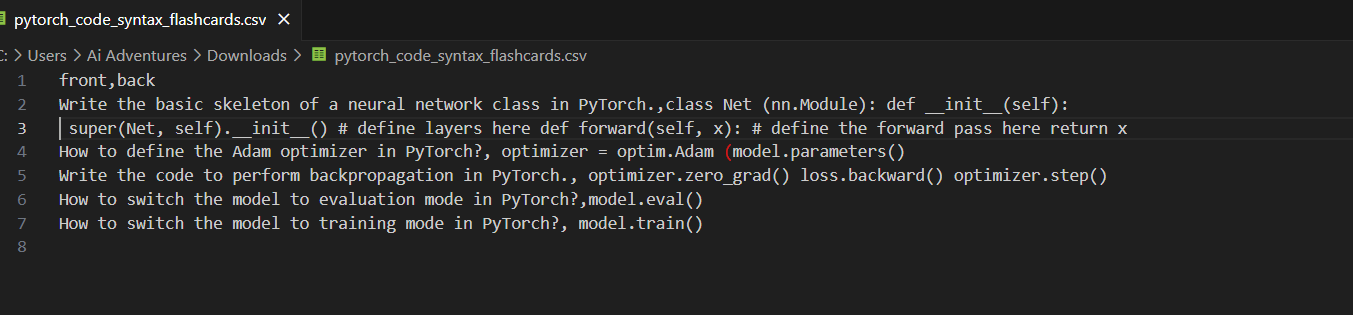

In [ ]:
### To create a dataset from this, we can use the upload_csv function:
dataset_name = "PyTorch code syntax"

csv_path = "pytorch_code_syntax_flashcards.csv"
input_keys = ["front"]
output_keys = ["back"]

csv_dataset = client.upload_csv(
   csv_file=csv_path,
   input_keys=input_keys,
   output_keys=output_keys,
   name=dataset_name,
   data_type="kv",
)


Powered By
The function has three required parameters: CSV path and the names of input/output columns. Once the upload finishes, the dataset will appear in the UI:
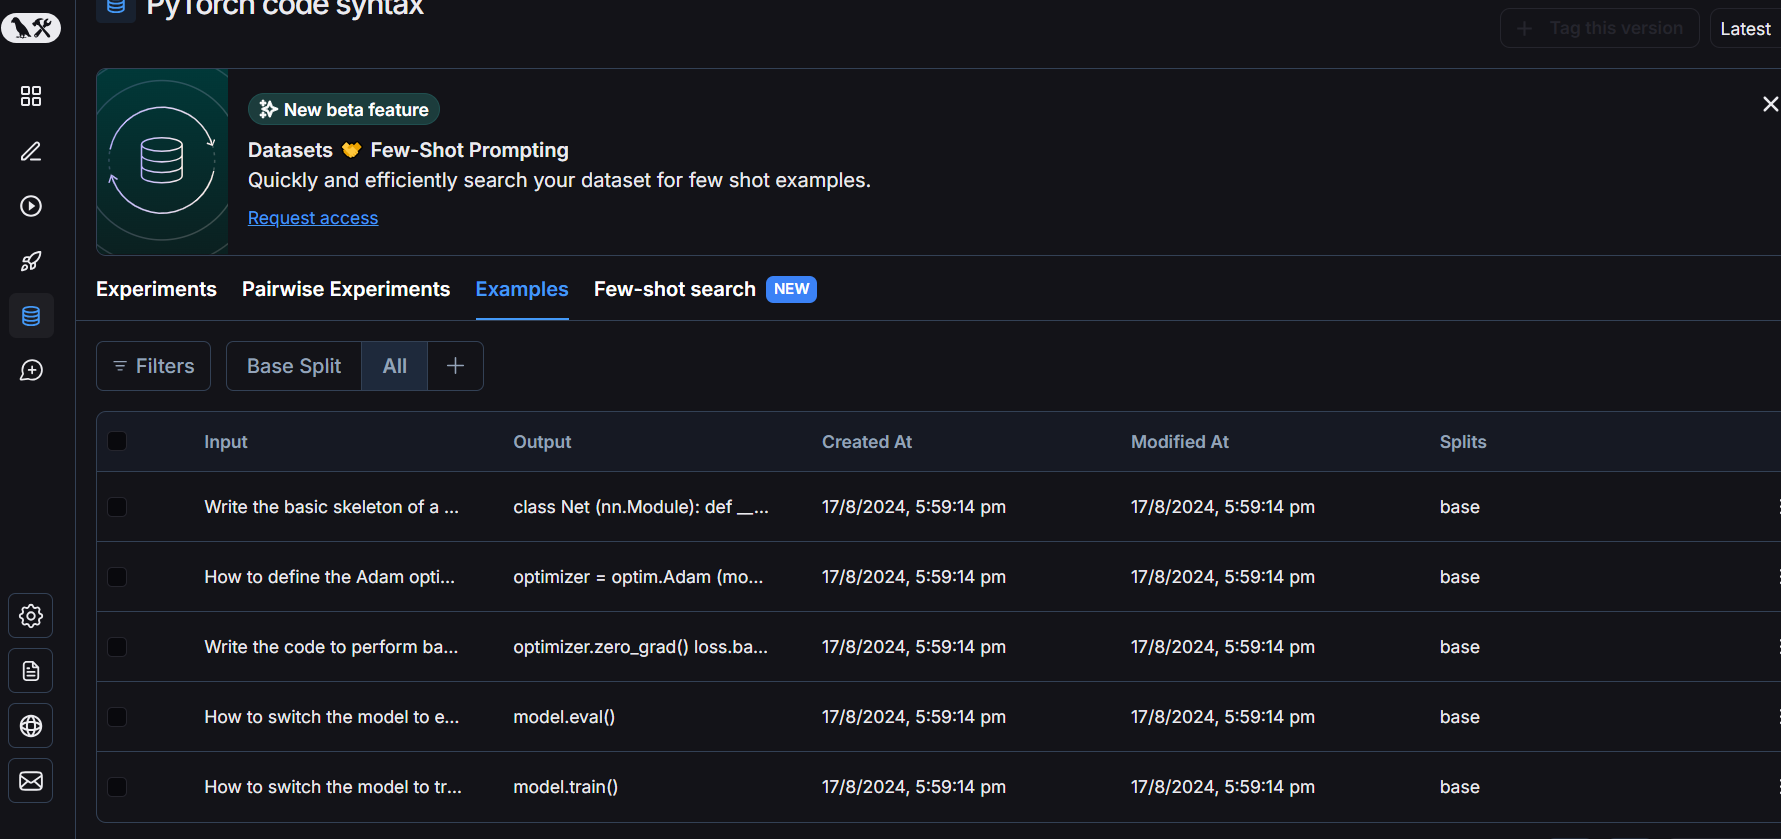

## **Evaluating Labeled Datasets**


Built-in and custom evaluators written in natural language are mostly for unlabeled datasets. For labeled datasets like the CSV dataset we uploaded, LangSmith offers more comprehensive evaluators for measuring the correctness of the response to a prompt:

context_qa (contextual Q&A): Uses the sample output as context while evaluating correctness
qa (Q&A): Instructs LLM to directly grade a response as "correct" or "incorrect" using the reference output
cot_qa (Chain-of-thought Q&A): Similar to context_qa but this evaluator forces the LLM to use chain-of-thought reasoning before reaching a verdict.
Let’s try the last one on our examples:




List of criteria to evaluate from.

In [ ]:
from langchain.evaluation import Criteria

list(Criteria)

[<Criteria.CONCISENESS: 'conciseness'>,
 <Criteria.RELEVANCE: 'relevance'>,
 <Criteria.CORRECTNESS: 'correctness'>,
 <Criteria.COHERENCE: 'coherence'>,
 <Criteria.HARMFULNESS: 'harmfulness'>,
 <Criteria.MALICIOUSNESS: 'maliciousness'>,
 <Criteria.HELPFULNESS: 'helpfulness'>,
 <Criteria.CONTROVERSIALITY: 'controversiality'>,
 <Criteria.MISOGYNY: 'misogyny'>,
 <Criteria.CRIMINALITY: 'criminality'>,
 <Criteria.INSENSITIVITY: 'insensitivity'>,
 <Criteria.DEPTH: 'depth'>,
 <Criteria.CREATIVITY: 'creativity'>,
 <Criteria.DETAIL: 'detail'>]

In [ ]:
from langchain.smith import RunEvalConfig
from langchain.smith import run_on_dataset


# List the eval criteria
eval_config = RunEvalConfig(
   evaluators=[
       RunEvalConfig.Criteria("conciseness"),
       RunEvalConfig.Criteria("coherence"),
   ],
    eval_llm = llm
)

results = run_on_dataset(
   llm_or_chain_factory=llm,
   client=client,
   dataset_name=dataset_name,
   evaluation=eval_config,
   project_name="criteria_test",
)

View the evaluation results for project 'criteria_test' at:
https://smith.langchain.com/o/3cedfb6a-a3a8-52ec-806a-04e007c363ed/datasets/a1de10f1-65b6-4a1c-9481-a6bc41a53900/compare?selectedSessions=354b4304-a07c-4e07-981d-2e4ea0bc0a2a

View all tests for Dataset PyTorch code syntax at:
https://smith.langchain.com/o/3cedfb6a-a3a8-52ec-806a-04e007c363ed/datasets/a1de10f1-65b6-4a1c-9481-a6bc41a53900
[------------------------------------------------->] 5/5

If you go to the dataset page and check out the run, we can see the average scores for each custom criteria:

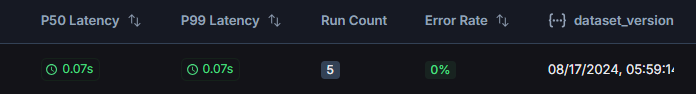

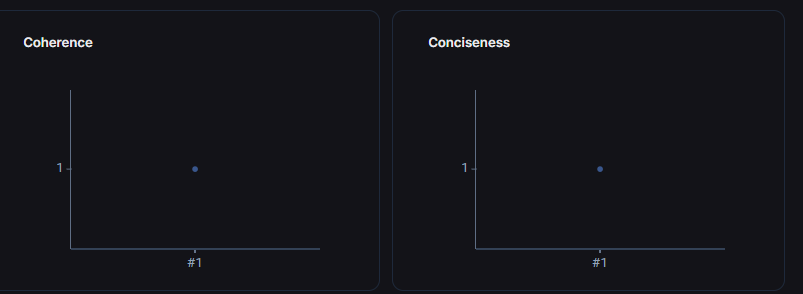

### Writing Custom Evaluators in LangSmith for Unlabeled Datasets

Of course, not all LLM use cases can be checked with basic evaluators. For example, there is no evaluator to check whether a flashcard contains a coding question or not. So, we better define it:

In [ ]:
eval_config = RunEvalConfig(
   evaluators=[
       RunEvalConfig.Criteria(
           {"has_code": "Does the card contain a code syntax question?"}
       ),
       RunEvalConfig.Criteria(
           {
               "is_vague": "Is the front of the flashcard vague, meaning it hasn't enough context to answer?"
           }
       ),
   ],
   eval_llm = llm
)

# Run the evaluation
results = run_on_dataset(
   client,
   dataset_name,
   llm,
   evaluation=eval_config,
   project_name="custom_criteria_test_csv",
)

View the evaluation results for project 'custom_criteria_test_csv' at:
https://smith.langchain.com/o/3cedfb6a-a3a8-52ec-806a-04e007c363ed/datasets/a1de10f1-65b6-4a1c-9481-a6bc41a53900/compare?selectedSessions=0afde258-f39d-4d06-be93-12a4dd7692bf

View all tests for Dataset PyTorch code syntax at:
https://smith.langchain.com/o/3cedfb6a-a3a8-52ec-806a-04e007c363ed/datasets/a1de10f1-65b6-4a1c-9481-a6bc41a53900
[------------------------------------------------->] 5/5

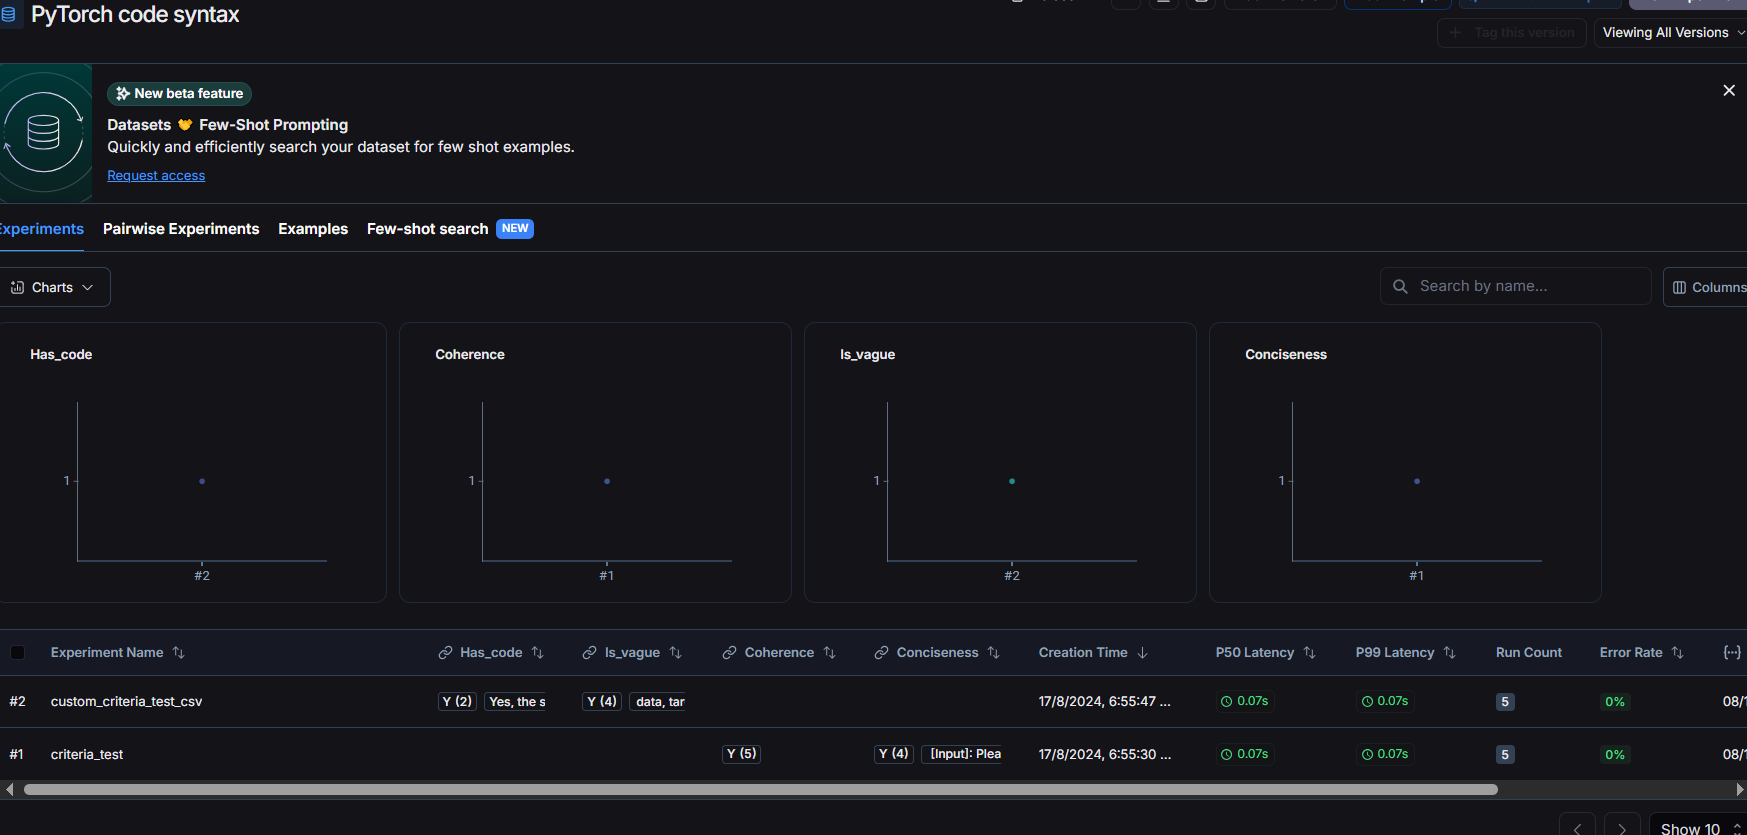

Please visit the [LangChain evaluators](https://python.langchain.com/v0.1/docs/guides/productionization/evaluation/) section of LangSmith docs to learn much more about evaluators.

Conclusion
If you’ve got the impression after reading this tutorial that LangSmith is really just a complex tool for prompt engineering, you’d be correct! Right now, LangSmith is the best framework for ensuring the instructions and outputs of LLMs are actually what you want.

You must have also realized the effort it takes to build production-grade LLM applications. So, use LangSmith for a smoother experience while working on LLM projects.

If some of the concepts in LangSmith didn’t make sense, you may be lacking some fundamentals in LangChain. Here are some resources on it:

- [Langsmith docs](https://python.langchain.com/v0.1/docs/langsmith/)
- [Langschain docs](https://python.langchain.com/v0.2/docs/introduction/)